Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 02: Decision Trees

## Introduction
By now everyone should have found a group. If someone still has none but wants to participate in the course please contact one of the tutors.

This week's sheet should be solved and handed in before the end of **Tuesday, May 4th, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whom ever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

YOUR ANSWER HERE

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

YOUR ANSWER HERE

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

YOUR ANSWER HERE

## Assignment 1: Decision Trees [4 Points]
Draw the decision trees for the following boolean functions. Either use pen and paper and scan/photograph the result or employ your ASCII artist within below.

Note: $\oplus := xor$, that means one of the operands has to be true, while the other one has to be false:

$\oplus$ | $B$ | $\neg B$
---------|-----|---------
$A$      |  f  |    t
$\neg A$ |  t  |    f

**a)** $\neg A \wedge B$


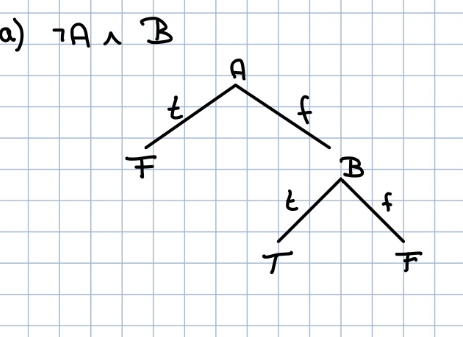

**b)** $A \oplus B$

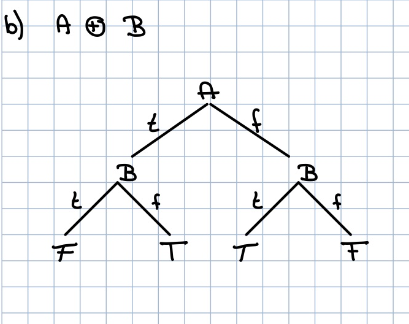

**c)** $A \vee (B \wedge C) \vee (\neg C \wedge D)$

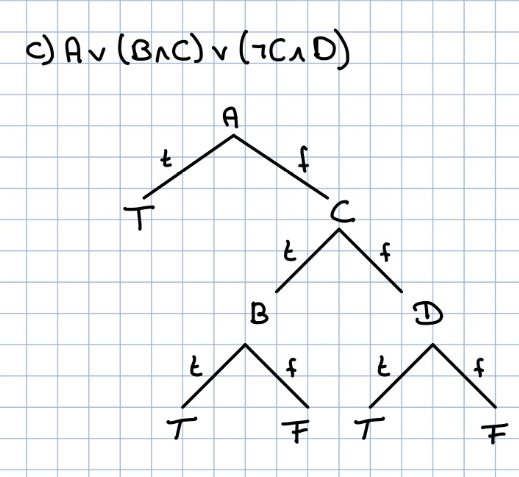

**d)** $(A \rightarrow (B \wedge \neg C)) \vee (A \wedge B)$

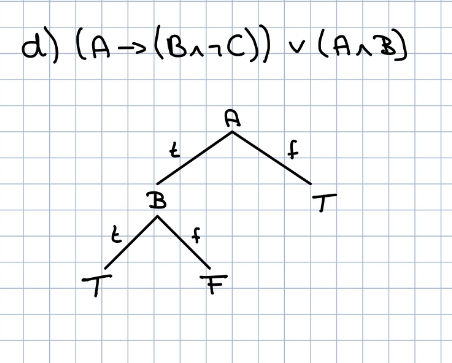

## Assignment 2: Entropy and Information Gain [8 Points]

In many machine learning applications it is crucial to determine which criterions are necessary for a good classification. Decision trees have those criterions close to the root, imposing an order from significant to less significant criterions. One way to select the most important criterion is to compare its information gain or its entropy to others. The following dataset is a hands-on example for this method.

Consider the following attributes with their possible values:

  * $raining = \{yes, no\}$
  * $tired = \{yes, no\}$
  * $late = \{yes, no\}$
  * $distance = \{short, medium, long\}$

And a training data set consisting of those attributes:

| #  | raining | tired | late | distance | attend_party |
|----|---------|-------|------|----------|--------------|
| 1  | yes     | no    | no   | short    | **yes**      |
| 2  | yes     | no    | yes  | medium   | **no**       |
| 3  | no      | yes   | no   | long     | **no**       |
| 4  | yes     | yes   | yes  | short    | **no**       |
| 5  | yes     | no    | no   | short    | **yes**      |
| 6  | no      | no    | no   | medium   | **yes**      |
| 7  | no      | yes   | no   | long     | **no**       |
| 8  | yes     | no    | yes  | short    | **no**       |
| 9  | yes     | yes   | no   | short    | **yes**      |
| 10 | no      | yes   | no   | medium   | **no**       |
| 11 | no      | yes   | no   | long     | **no**       |
| 12 | no      | yes   | yes  | short    | **no**       |

**a)** Build the root node of a decision tree from the training samples given in the table above by calculating the information gain for all four attributes (raining, tired, late, distance).

$$\operatorname{Gain}(S,A) = \operatorname{Entropy}(S) - \sum_{v \in \operatorname{Values}(A)} \frac{|S_v|}{|S|}\operatorname{Entropy}(S_v)$$

$$\operatorname{Entropy}(S) = -p_{\oplus} log_{2} p_{\oplus} - p_{\ominus} log_{2} p_{\ominus}$$

$S$ is the set of all data samples. $S_v$ is the subset for which attribute $A$ has value $v$. An example for attribute **tired** with value $yes$ would be:
$$|S_{yes}| = 7, S_{yes}:[1+, 6−]$$

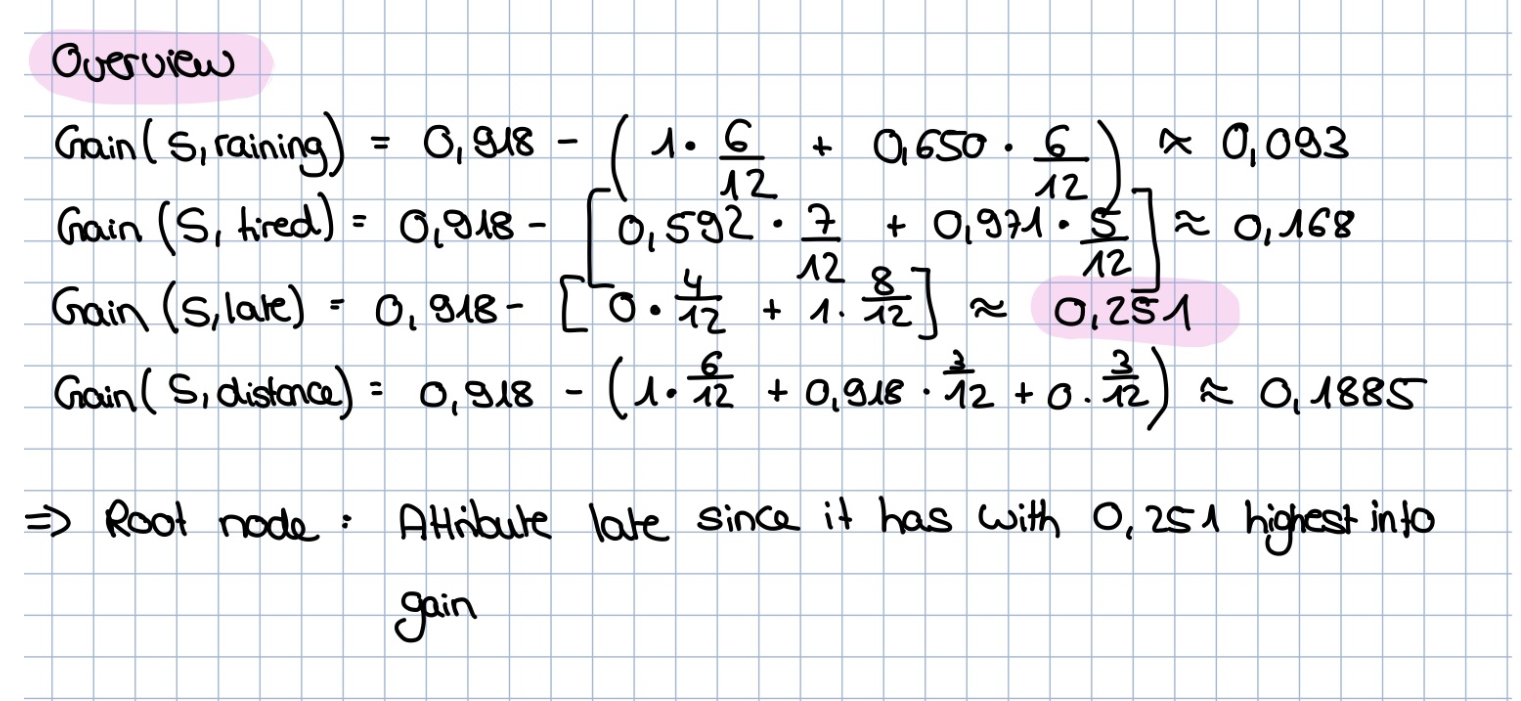

**b)** Perform the same calculation as in **a)** but use the gain ratio instead of the information gain. Does the result for the root node change?

$$\operatorname{GainRatio}(S,A) = \frac{\operatorname{Gain}(S,A)}{\operatorname{SplitInformation}(S,A)}$$

$$\operatorname{SplitInformation}(S,A) = - \sum_{v \in \operatorname{Values}(A)} \frac{|S_v|}{|S|} \log_{2} \frac{|S_{v}|}{|S|}$$

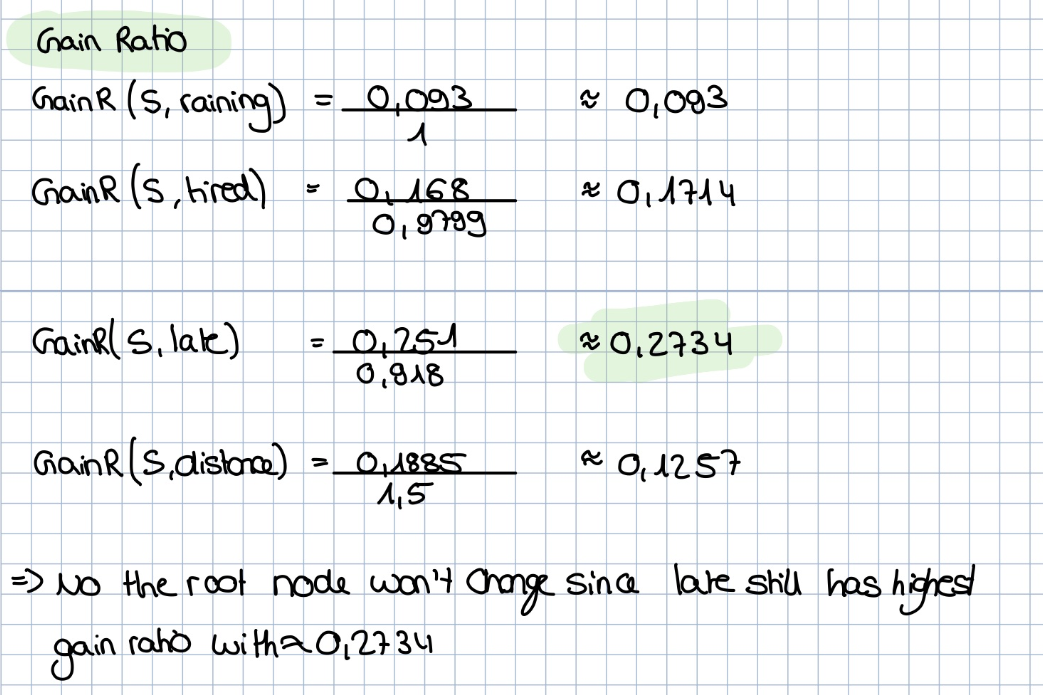

## Assignment 3: ID3 algorithm [4 Points]

Implement the following two functions in Python. Take a look at the `assert`s to see how the function should behave. An assert is a condition that your function is required to pass. Most of the conditions here are taken from the lecture slides (ML-03, Slide 12 & 13). Don't worry if you do not get all asserts to pass, just comment the failing ones out.

**a) Entropy**

$$\operatorname{Entropy}(S) = - \sum_{i=1...c} p_i \log_2 p_i$$

In [17]:
from math import log2
def entropy(s):
    """
    Calculate the entropy for a given target value set.

    Args:
        s (list): Target classes for specific observations.

    Returns:
        The entropy of s.
    """
    information_content = []
    
    # calculate the information content for each attribute value  
    for target in set(s):
        
        probability = s.count(target) / len(s)    
        information_content.append((-1)*probability*log2(probability))        
    
    return sum(information_content)    # sum up all information contents to get entropy
        
        


# See ML-03, Slide 12 & 13

In [18]:
assert entropy([1,1,1,0,0,0]) == 1.0
assert round(entropy([1,1,1,1,0,0,0]), 3) == 0.985
assert round(entropy([1,1,1,1,1,1,0]), 3) == 0.592
assert round(entropy([1,1,1,1,1,1,0,0]), 3) == 0.811
assert round(entropy([2,2,1,1,0,0]), 3) == 1.585
assert round(entropy([2,2,2,1,0]), 3) == 1.371
assert round(entropy([2,2,2,0,0]), 3) == 0.971
assert entropy(['yes','yes','yes','no','no','no']) == 1.0

**b)** Information Gain

$$\operatorname{Gain}(S,A) = \operatorname{Entropy}(S) - \sum_{v \in \operatorname{Values}(A)} \frac{|S_v|}{|S|} \operatorname{Entropy}(S_v)$$

In [19]:
def gain(targets, attr_values):
    """
    Calculates the expected reduction in entropy due to sorting on A.

    Args:
        targets (list): Target classes for observations in attr_values.
        attr_values (list): Values of each instance for the respective attribute.

    Returns:
        The information gain of
    """
   
    entropies = []              
    
    for attr in set(attr_values):        
        
        # get the target values of this attr     
        target_values = [tar for elem, tar in zip(attr_values,targets) if elem == attr] 
        
        # append the entropy from this attribute (times probability over all target points) to all entropies
        entropies.append(entropy(target_values) * attr_values.count(attr) / len(targets))
        
        # substract the sum of all attribute entropies from the set entropy
    return entropy(targets) - sum(entropies) #information gain
        
    
        

    

# See ML-03, Slide 12 & 13


In [20]:
# The lists here can each be seen as one column of a table such as the one in assignment 2.
# Assert targets would be the last column, while the attribute values are the values of one attribute, here the
# example rain and distance
assert_targets = ["no","no","yes","yes","yes","no","yes","no","yes","yes","yes","yes","yes","no"]
assert_attribute_values_1 = ["yes", "yes","yes","yes","no", "no", "no", "yes", "no", "no", "no","yes", "no", "yes"]
assert_attribute_values_2 = ["high","low","medium","high","high","medium","low","medium","low","high","high","medium","low","low"]
assert_attribute_values_3 = [0,1,0,0,0,1,1,0,0,0,1,1,0,1]
assert round(gain(assert_targets, assert_attribute_values_1), 3) == 0.152
assert round(gain(assert_targets, assert_attribute_values_2), 3) == 0.05
assert round(gain(assert_targets, assert_attribute_values_3), 3) == 0.048

**c)** ID3

In the next two cells we have implemented the ID3 algorithm following the pseudocode from [Wikipedia](https://en.wikipedia.org/wiki/ID3_algorithm#Pseudocode) - it relies on your two functions from above, `entropy` and `gain`. Try to understand what the code does and replace `# YOUR CODE HERE` with meaningful comments describing the respective parts of the code. Though its often annoying, being able to read other peoples code is one of the key skills (and obstacles) in software engineering. So give it a try! Otherwise you are of course welcome to write your own implementation.

In [21]:
from collections import Counter, namedtuple


class Node(namedtuple('Node', 'label children')):
    """
    A small node representation with a pretty string representation.
    """
    def __str__(self, level=0):
        return_str ='{}{!s}\n'.format(' ' * level * 4, self.label)
        for child in self.children:
            return_str += child.__str__(level + 1)
            
        return return_str

def id3(examples, attributes, target_attribute=None):
    
    """
    Calculate a tree of Nodes (fields: label [string], children [list])
    using the ID3 algorithm found as pseudocode on Wikipedia.
    """
    # This if statement checks whether all examples have the same target value, no matter whether positive or negative.
    # By comparing each target value with the target value of our first example we can easily check whether all values are 
    # the same 
    # If it is the case, a node with the target value is created and returned    
    if all(target == examples['targets'][0] for target in examples['targets']):
        return Node('Result: {!s}'.format(examples['target_names'][examples['targets'][0]]), []) #  create new instance

   
   
    # If we do not have any attribute left:
    # Lable the leaf with the most common target value of our set from our attribute/node(from before) 
    if len(attributes) == 0:      
        
        attr = Counter(data_sample[target_attribute] for data_sample in examples['data']).most_common(1)       
        
        return Node('Attribute: {!s}, {!s} occurences'.format(examples['attributes'][target_attribute], attr), [])

   
    # Generate a list with the information gain of each possible attribute 
    gains = [gain(examples['targets'], [r[attribute] for r in examples['data']])
             for attribute in attributes]
    
    max_gain_attribute = attributes[gains.index(max(gains))] # gives index of attributes with highest information gain

    # we create an instance of node as root node.
    # The attribute with the highest information gain is the root node
    root = Node('Attribute: {!s} (gain {!s})'.format(examples['attributes'][max_gain_attribute],
                                                     round(max(gains), 4)), [])
  

    # Create subtrees of the (root)-node
    # For each attribute value of our (root-) node...
    # ...create a branch with respective attribute values 
    for vi in set(data_sample[max_gain_attribute] for data_sample in examples['data']):
      
        child = Node('Value: {!s}'.format(vi), []) # create a node instance "child" and add it to our root
        root.children.append(child)

        # create a list with the indices of the examples which have the attribute value vi
        vi_indices = [idx for idx, data_sample in enumerate(examples['data'])
                          if data_sample[max_gain_attribute] == vi]
        examples_vi = dict(examples)  
        examples_vi['data'] = [examples['data'][i] for i in vi_indices] # add all examples with the attribute value vi 
        examples_vi['targets'] = [examples['targets'][i] for i in vi_indices] # add respective targets as well
        
        # if there are still examples in the subset, recursively call id3 to create subtree
        if examples_vi['data']:
            
            # recursively call:             
            child.children.append(
                id3(examples_vi, # example subset
                    [attribute_ for attribute_ in attributes if not attribute_ == max_gain_attribute], # only attributes which haven't been used yet
                    max_gain_attribute) # "the old root node"
            )

        else:
            # If we do not have data in our subset, we add the most common target value of the examples which are in our root node
            attr = Counter(examples_vi['targets']).most_common(1)
            label = 'Attribute: {!s}, {!s} occurences'.format(examples['attributes'][target_attribute], attr)
            child.children.append(Node(label, []))

    return root

**d)** The algorithm is applied to two data sets. Run those and discuss the differences. For which data set is the ID3 algorithm better suited and why?

This code runs the ID3 algorithm on the party data set which you already know from assignment 2.

In [22]:
import json

with open('party.json', 'r') as party_file:
    party = json.load(party_file)

# Make sure our gain function handles the data set as expected.
assert round(gain(party['targets'], [r[2] for r in party['data']]), 3) == 0.252

# Apply ID3 algorithm
tree_party = id3(party, list(range(len(party['attributes']))))

print(tree_party)

Attribute: late (gain 0.2516)
    Value: yes
        Result: no
    Value: no
        Attribute: distance (gain 0.75)
            Value: short
                Result: yes
            Value: long
                Result: no
            Value: medium
                Attribute: tired (gain 1.0)
                    Value: yes
                        Result: no
                    Value: no
                        Result: yes



This code runs the ID3 algorithm on the famous iris flowers data set.

In [23]:
import json

with open('iris.json', 'r') as iris_file:
    iris = json.load(iris_file)

# Make sure our gain function handles the data set as expected.
assert round(gain(iris['targets'], [r[2] for r in iris['data']]), 3) == 1.446

# Apply ID3 algorithm
tree_iris = id3(iris, list(range(len(iris['attributes']))))

print(tree_iris)

Attribute: petal length (gain 1.4463)
    Value: 4.3
        Result: Iris-versicolor
    Value: 3.8
        Result: Iris-versicolor
    Value: 3.0
        Result: Iris-versicolor
    Value: 4.4
        Result: Iris-versicolor
    Value: 1.3
        Result: Iris-setosa
    Value: 6.7
        Result: Iris-virginica
    Value: 4.0
        Result: Iris-versicolor
    Value: 1.1
        Result: Iris-setosa
    Value: 6.0
        Result: Iris-virginica
    Value: 4.6
        Result: Iris-versicolor
    Value: 4.7
        Result: Iris-versicolor
    Value: 4.2
        Result: Iris-versicolor
    Value: 5.2
        Result: Iris-virginica
    Value: 6.1
        Result: Iris-virginica
    Value: 5.6
        Result: Iris-virginica
    Value: 1.7
        Result: Iris-setosa
    Value: 3.7
        Result: Iris-versicolor
    Value: 1.0
        Result: Iris-setosa
    Value: 1.9
        Result: Iris-setosa
    Value: 5.4
        Result: Iris-virginica
    Value: 6.6
        Result: Iris-virginica
  

In general we think that it is better suited for the party data set since we take information gain and not information ratio:

in the party data set we have discrete attribute values. Attribute "distance" has with 3 possible attribute values the most. 
Whereas in the iris flowers data set we have a very broad range and individual attribute values (continous) for each attribute, causing more branches in our tree. 
By branching a lot the probability that we might overfit the trainings data rises, since we make "more specific decisions" regarding the data set and generalize less, like in the party data set. 

So our presumption is that both trees might have similar high accuracy when it comes to the accuracy on our trainings set.
But the party-set-tree would perform better on a testing set, since it already generalizes more during the training. 

If our algorithm would use information ratio instead of information gain, ID3 might fit both data sets equally well. Since we also take the impurity of attributes into consideration and punish high impurity by reducing information gain.
Or introducing thresholds for the continuouse values might be even better than only switching to information gain ration. 

Nonetheless it is also important to mention that the tree for the party data set, does not include the 'raining'-attribute, since this attribute is not important for our training data set, but it might cause problems later with unseen data. 

## Assignment 4: Decision Trees on Iris Flowers [4 Points]

In this exercise we are going to examine and compare two decision trees that were generated from the iris flower data set to classify three variations of Iris flowers. The Iris data set is a classical example of a labeled dataset, i.e. every sample consists of two parts: features and labels. There are four features per sample in this data set (sepal length ($x_1$), sepal width ($x_2$), petal length ($x_3$) and petal width ($x_4$) in cm) and a corresponding label (Iris Setosa, Iris Versicolour, Iris Virginica). These samples are by nature **noisy**, no matter how carefully the measurement was taken - slight deviation from the actual length **cannot be avoided**. We want to learn how the features are related to the label so that we could (in the future) predict the label of a new sample automatically. One way to obtain such a `classifier` is to train a decision tree on the data.

Here are two decisions tree generated by the data set. We will now take a closer look.

**Tree 1:**

**Tree 2:**

**a)** What does it mean that the features $x1$ and $x2$ do not appear in the decision trees?

It shows that the information gain of x1 and x2 is smaller compared to x3, x4. (the subsets created by their split have higher entropy -> more impure)
Furthermore, a classifications of the data seems to be possible without using these two features. 


**b)** With which method from the lecture might the second tree have been generated from the first one? Explain the procedure.

By reduced error pruning: 
In this procedure each node is taken into consideration, it is checked whether the performance on a validation set doesn't get worse if a certain node is pruned. 
Pruning one node includes pruning its whole subtree as well. 
It is a method to avoid overfitting of our tree and get a tree which generalizes better. 

**c)** After training the tree we can calculate the accuracy, i.e. the percentage of the training set that is classified correctly. Although the first tree was trained on the data set until no improvement of the accuracy was possible, its accuracy is *only* 98%. Explain why it is not 100 %

Taken the randomness of nature into consideration 100% on the training datset would be an indicator of overfitting rather than a testiment to its quality. On such a fluctating and large dataset outliers are bound to happen. For instance a virginica being exposed to especially good soil might have a extraordinary sepal length/width being more similiar to datapoints from the versicolor class. So if the tree would branch more specifically for this one datapoint it might misclassify other datapoints later (therefore lowering the accuracy even more).

**d)** Tree 2 only has a 96% accuracy on the training set. Why might this tree still be preferable over tree 1?

It might seem to be preferable in terms of generalization. The first tree has been generated very close to the training data which might lead to overfitting. 
Whereas pruning in tree 2 forces the tree to generalize over the training data. Furthermore assuming that it has been generated by reduced error pruning a validation set has been used and not the training set to calculate its performance. 
The validation set includes examples, which haven't been used during training. 
Hence, if a tree performs well o the valitaion set we can assume that it will work on average quite well with any unseen data.
